In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# import dataset from inbuilt datasets from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

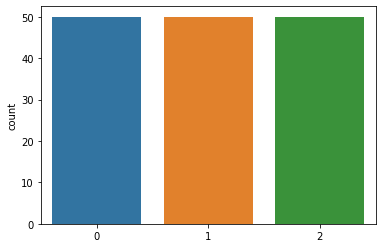

In [6]:
sns.countplot(iris['target'])

In [7]:
dataset = pd.DataFrame(np.c_[iris['data'] , iris['target']] , columns=(np.append(iris['feature_names'] , ['targetd'])))

In [8]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targetd
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
dataset = pd.DataFrame(iris['data'],columns=(np.append(iris['feature_names'])))
dataset.head()

TypeError: append() missing 1 required positional argument: 'values'

In [11]:
#create feature matrix 
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size =0.2, random_state=0)

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(x_train , y_train)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(x_test)

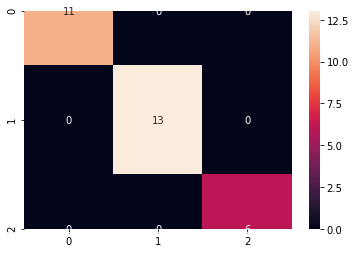

In [20]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [21]:
accuracy_score(y_test , y_pred)

1.0